In [75]:
# import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [76]:
# đọc dữ liệu
df = pd.read_csv('Credit_scoring.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


In [77]:
# thông tin bộ dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [78]:
# thống kê dữ liệu
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.202620e+05,149992.000000,149992.000000,149992.000000,149992.000000,146068.000000
mean,75004.500000,0.066837,6.048729,52.295516,0.421029,352.985824,6.669872e+03,8.452877,0.265981,1.018221,0.240399,0.757236
std,43299.105125,0.249740,249.762028,14.771902,4.192890,2037.824499,1.438414e+04,5.146006,4.169414,1.129704,4.155290,1.115103
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37506.750000,0.000000,0.029863,41.000000,0.000000,0.175075,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75004.500000,0.000000,0.154162,52.000000,0.000000,0.366516,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112502.250000,0.000000,0.559012,63.000000,0.000000,0.868292,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [79]:
# kiểm tra dữ liệu khuyết thiếu
df.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29730
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [80]:
# Xử lý giá trị khuyết thiếu bằng giá trị nội suy theo các cột
df.interpolate(inplace=True)
df.isna().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           1
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      1
dtype: int64

In [81]:
# Thay thế giá trị khuyết thiếu bằng giá trị 0
df.fillna(0, inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         149992 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

<AxesSubplot:>

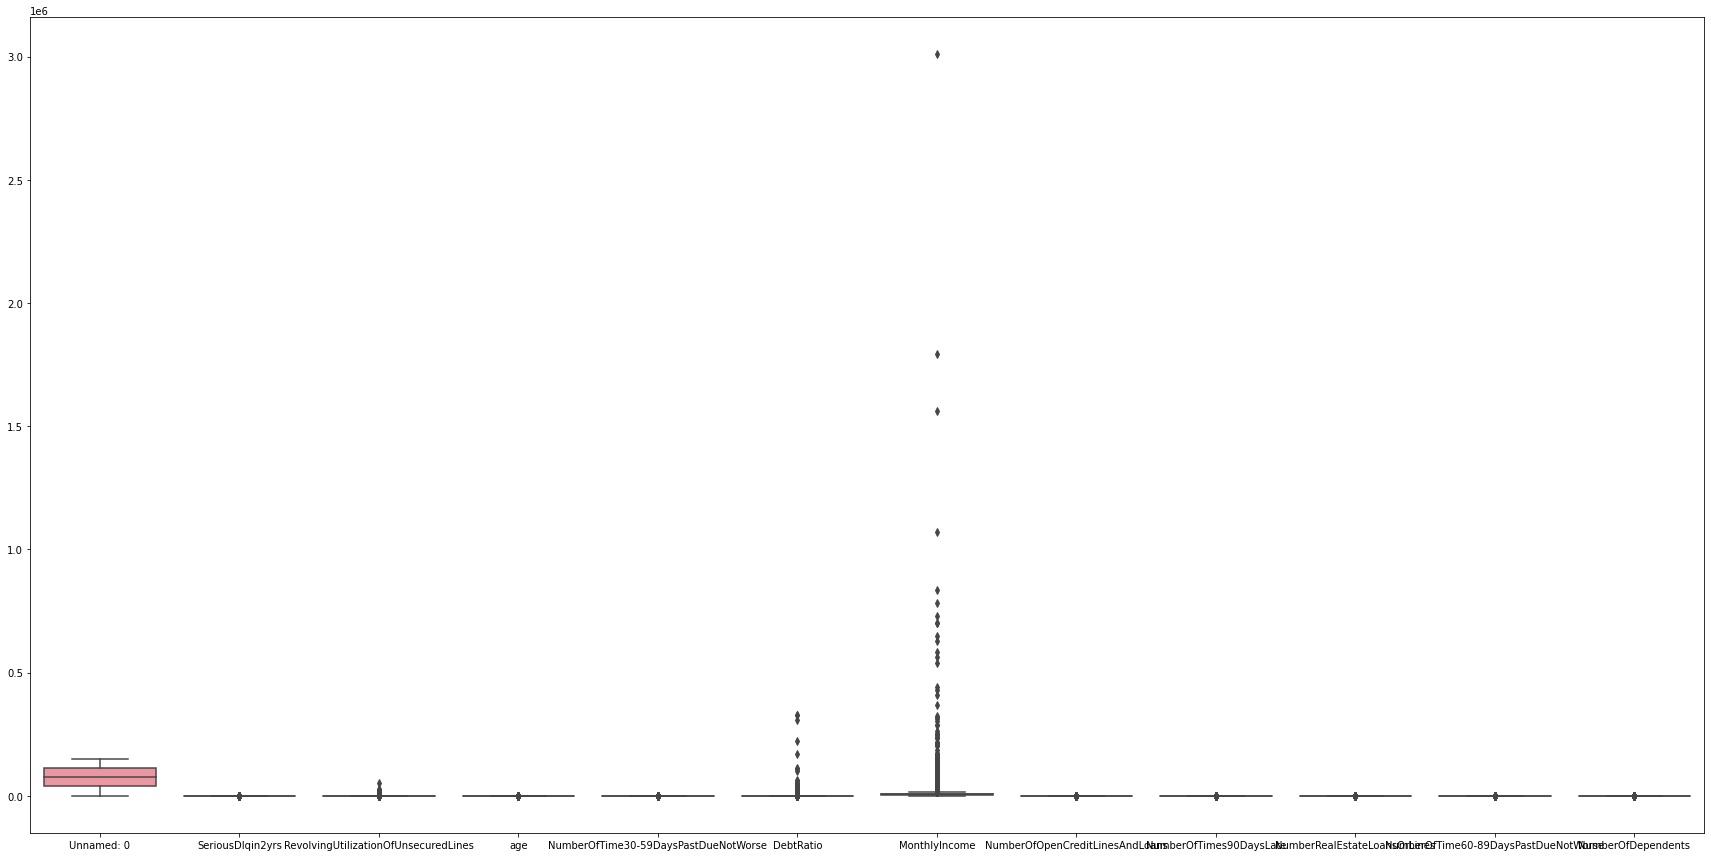

In [83]:
# Vẽ biểu đồ boxplot với các cột
plt.figure(figsize=(30,15))
sns.boxplot(data=df)

In [84]:
# Loại bỏ các giá trị ngoại lai cũng giống như những bài trước ta lại dùng IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0                              74995.500000
SeriousDlqin2yrs                            0.000000
RevolvingUtilizationOfUnsecuredLines        0.529149
age                                        22.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.693217
MonthlyIncome                            4628.750000
NumberOfOpenCreditLinesAndLoans             6.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                2.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          1.000000
dtype: float64


In [85]:
# Điểm ngoại lai sẽ là những điểm mà nằm dưới Q1 ít nhất là 1.5*IQR, hoặc nằm trên Q3 ít nhất là 1.5*IQR.
print((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

        Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0            False             False                                 False   
1            False             False                                 False   
2            False             False                                 False   
3            False             False                                 False   
4            False             False                                 False   
...            ...               ...                                   ...   
149987       False             False                                 False   
149988       False             False                                 False   
149989       False             False                                 False   
149990       False             False                                 False   
149991       False             False                                 False   

          age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio 

In [86]:
# xác định phần tử không phải ngoại lai
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [87]:
df1.shape

(76585, 12)

<AxesSubplot:>

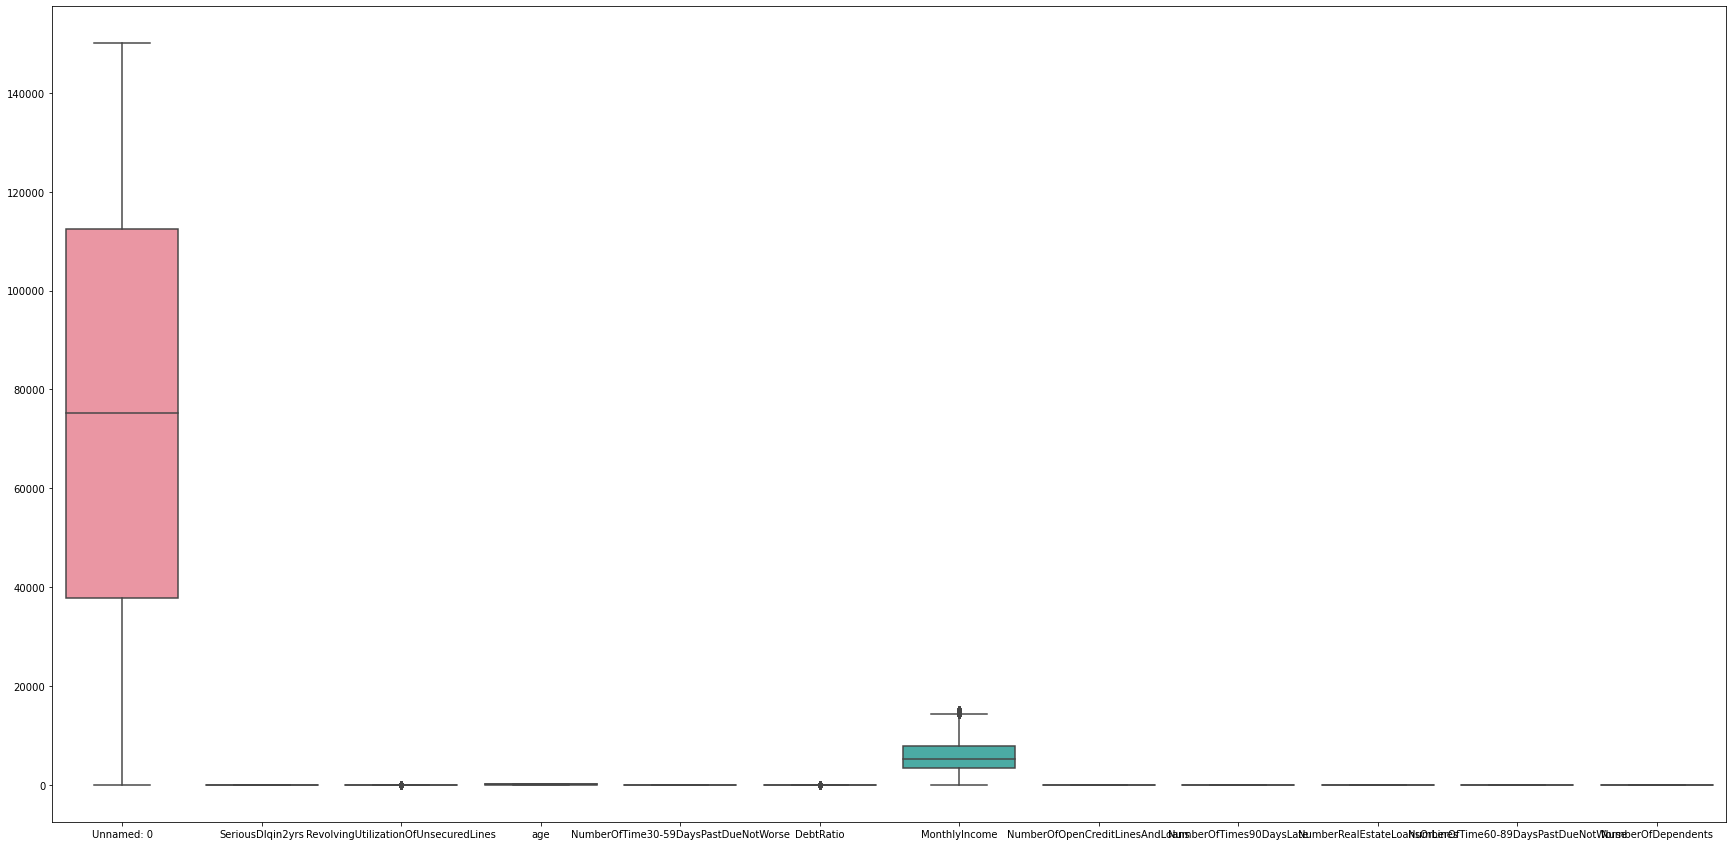

In [88]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df1)

##### Chia dữ liệu ở các cột thành 4,5,6 nhóm có số lượng phần tử bằng nhau và đếm số lượng phần tử ở mỗi nhóm, lấy ra khoảng giữ liệu của mỗi nhóm.

In [89]:
# ta chia thử dữ liệu vài một vài cột
# Thử chia trên cột age
roirac = pd.qcut(df1['age'],4)
roirac1 = pd.qcut(df1['age'],5)
roirac2 = pd.qcut(df1['age'],6)

In [90]:
roirac

2         (20.999, 41.0]
3           (41.0, 53.0]
4           (41.0, 53.0]
7           (53.0, 64.0]
9           (41.0, 53.0]
               ...      
149986      (41.0, 53.0]
149987      (64.0, 96.0]
149988      (41.0, 53.0]
149990    (20.999, 41.0]
149991      (53.0, 64.0]
Name: age, Length: 76585, dtype: category
Categories (4, interval[float64]): [(20.999, 41.0] < (41.0, 53.0] < (53.0, 64.0] < (64.0, 96.0]]

In [91]:
# khoảng dữ liệu giữa các nhóm
roirac.values.categories

IntervalIndex([(20.999, 41.0], (41.0, 53.0], (53.0, 64.0], (64.0, 96.0]],
              closed='right',
              dtype='interval[float64]')

In [92]:
#thống kê số lượng phần tử
#pd.value_counts(roirac)
#pd.value_counts(roirac1)
pd.value_counts(roirac2)

(45.0, 53.0]      13645
(20.999, 36.0]    13035
(60.0, 68.0]      12748
(36.0, 45.0]      12640
(68.0, 96.0]      12619
(53.0, 60.0]      11898
Name: age, dtype: int64

#### Chia dữ liệu ở các cột age và MonthlyIncome thành 5 nhóm theo các khoảng: 0, 30, 40, 50, 80, 150 và đếm số lượng phần tử ở mỗi nhóm

In [93]:
# tạo khoảng 
bins = [0, 30, 40, 50, 80, 150]
# chia cột age theo khoảng
df_age = pd.cut(df1['age'], bins)

In [94]:
# đếm số lượng phần tử mỗi nhóm
df_age.value_counts()

(50, 80]     39520
(40, 50]     15830
(30, 40]     12332
(0, 30]       6028
(80, 150]     2875
Name: age, dtype: int64

In [95]:
# chia cột MonthlyIncome theo khoảng
df_month = pd.cut(df1['MonthlyIncome'], bins)

In [96]:
# đếm sô lượng phần tử mỗi nhóm
df_month.value_counts()

(0, 30]      42
(80, 150]    15
(30, 40]      1
(50, 80]      1
(40, 50]      0
Name: MonthlyIncome, dtype: int64

#### Đặt tên bất kỳ cho các nhóm ở 2 ý trên

In [97]:
# Lable theo các nhóm Age
label = ['Trẻ','Cận Trung Niên','Trung Niên','Người Lớn','Người Già']
df_age = pd.cut(df1['age'], bins,labels=label)
df_age.value_counts()

Người Lớn         39520
Trung Niên        15830
Cận Trung Niên    12332
Trẻ                6028
Người Già          2875
Name: age, dtype: int64

In [98]:
# Lable theo các nhóm MonthlyIncome
label = ['Quá Thấp','Thấp','Trung Bình','Cao','Rất Cao']
df_age = pd.cut(df1['MonthlyIncome'], bins,labels=label)
df_age.value_counts()

Quá Thấp      42
Rất Cao       15
Thấp           1
Cao            1
Trung Bình     0
Name: MonthlyIncome, dtype: int64